In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student.csv')
print(data.shape)
print(data.head())

(1000, 3)
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62


In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

In [4]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T

In [5]:
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [6]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [7]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [8]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [9]:
# 1000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 1000)

In [10]:
# New Values of B
print(newB)

[0.00274048 0.09441056 0.89189383]


In [11]:
# Final Cost of new B
print(cost_history[-1])

10.500043218864263


In [12]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [13]:
Y_pred = X.dot(newB)

In [14]:
print(rmse(Y, Y_pred))

4.582585126075514


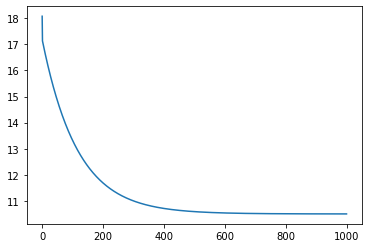

In [15]:
plt.plot(cost_history[:1000])
plt.show()